In [44]:
%matplotlib inline

In [85]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [50]:
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("fusebox.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                288 non-null    object 
 1   artist            288 non-null    object 
 2   album             288 non-null    object 
 3   title             288 non-null    object 
 4   key               288 non-null    int64  
 5   time_signature    288 non-null    int64  
 6   danceability      288 non-null    float64
 7   energy            288 non-null    float64
 8   loudness          288 non-null    float64
 9   speechiness       288 non-null    float64
 10  acousticness      288 non-null    float64
 11  instrumentalness  288 non-null    float64
 12  liveness          288 non-null    float64
 13  valence           288 non-null    float64
 14  tempo             288 non-null    float64
 15  duration_ms       288 non-null    float64
 16  num_played        288 non-null    int64  
 1

In [10]:
data.describe()

,key,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,num_played,rate
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,5.170139,3.895833,0.497410,0.631624,-7.512840,0.044078,0.227312,0.113063,0.166878,0.371990,119.682785,246537.218750,1.163194,5.836806
std,3.616967,0.377388,0.146455,0.203876,2.947882,0.029634,0.272306,0.229659,0.132567,0.216929,27.647469,56075.221364,0.388555,1.762294
min,0.000000,1.000000,0.194000,0.062600,-19.536000,0.024300,0.000006,0.000000,0.036800,0.031200,50.293000,124096.000000,1.000000,2.000000
25%,2.000000,4.000000,0.388000,0.470750,-9.297000,0.030575,0.015500,0.000086,0.095625,0.188750,99.998750,201887.500000,1.000000,5.000000
50%,5.000000,4.000000,0.499000,0.663000,-7.155500,0.035250,0.114000,0.003600,0.115000,0.342500,119.999500,239926.500000,1.000000,6.000000
75%,8.000000,4.000000,0.601500,0.803000,-5.385000,0.046025,0.343000,0.063150,0.174250,0.512250,137.228000,273884.750000,1.000000,7.000000
max,11.000000,5.000000,0.885000,0.994000,-1.817000,0.317000,0.989000,0.948000,0.752000,0.964000,190.080000,453949.000000,3.000000,10.000000


In [11]:
data.head()

,id,artist,album,title,key,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,num_played,rate
0,spotify:track:13uyMAetJNWMWJamO4aynQ,Arcade Fire,The Suburbs,Rococo,7,3,0.315,0.861,-5.292,0.0377,0.281000,0.29500,0.266,0.417,165.644,236773.0,1,9.0
1,spotify:track:1hG9eNIH2XHlr3rwpheaf2,White Lies,To Lose My Life ...,A Place To Hide,2,4,0.493,0.895,-4.916,0.0627,0.000897,0.00384,0.156,0.159,138.853,301760.0,1,5.0
2,spotify:track:3oqBOAsqRMKUHc8MGx4o72,White Lies,To Lose My Life ...,Death,7,4,0.454,0.832,-5.649,0.0343,0.000451,0.01880,0.076,0.228,135.087,301213.0,2,8.0
3,spotify:track:4G9aoDV0KAsAYqTEKY53BF,Manchester Orchestra,I Know How To Speak,I Know How To Speak,11,4,0.505,0.620,-8.635,0.0268,0.001540,0.28100,0.093,0.255,149.965,360213.0,1,10.0
4,spotify:track:1LomCMl5wD3MPVlC6smUHe,Wolf Alice,Visions Of A Life,Don’t Delete The Kisses,5,4,0.604,0.789,-6.259,0.0273,0.001100,0.82800,0.368,0.348,122.032,275227.0,1,7.0


In [14]:
y = data["rate"]

In [17]:
y

0       9.0
1       5.0
2       8.0
3      10.0
4       7.0
       ... 
283     8.0
284     8.0
285     9.0
286     8.0
287     6.0
Name: rate, Length: 288, dtype: float64

In [34]:
X = data.iloc[:, 4:-3]

In [35]:
X.head()

,key,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7,3,0.315,0.861,-5.292,0.0377,0.281000,0.29500,0.266,0.417,165.644
1,2,4,0.493,0.895,-4.916,0.0627,0.000897,0.00384,0.156,0.159,138.853
2,7,4,0.454,0.832,-5.649,0.0343,0.000451,0.01880,0.076,0.228,135.087
3,11,4,0.505,0.620,-8.635,0.0268,0.001540,0.28100,0.093,0.255,149.965
4,5,4,0.604,0.789,-6.259,0.0273,0.001100,0.82800,0.368,0.348,122.032


In [38]:
X.describe()

,key,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,5.170139,3.895833,0.497410,0.631624,-7.512840,0.044078,0.227312,0.113063,0.166878,0.371990,119.682785
std,3.616967,0.377388,0.146455,0.203876,2.947882,0.029634,0.272306,0.229659,0.132567,0.216929,27.647469
min,0.000000,1.000000,0.194000,0.062600,-19.536000,0.024300,0.000006,0.000000,0.036800,0.031200,50.293000
25%,2.000000,4.000000,0.388000,0.470750,-9.297000,0.030575,0.015500,0.000086,0.095625,0.188750,99.998750
50%,5.000000,4.000000,0.499000,0.663000,-7.155500,0.035250,0.114000,0.003600,0.115000,0.342500,119.999500
75%,8.000000,4.000000,0.601500,0.803000,-5.385000,0.046025,0.343000,0.063150,0.174250,0.512250,137.228000
max,11.000000,5.000000,0.885000,0.994000,-1.817000,0.317000,0.989000,0.948000,0.752000,0.964000,190.080000


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               288 non-null    int64  
 1   time_signature    288 non-null    int64  
 2   danceability      288 non-null    float64
 3   energy            288 non-null    float64
 4   loudness          288 non-null    float64
 5   speechiness       288 non-null    float64
 6   acousticness      288 non-null    float64
 7   instrumentalness  288 non-null    float64
 8   liveness          288 non-null    float64
 9   valence           288 non-null    float64
 10  tempo             288 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 24.9 KB


array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'num_played'}>,
        <AxesSubplot:title={'center':'rate'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

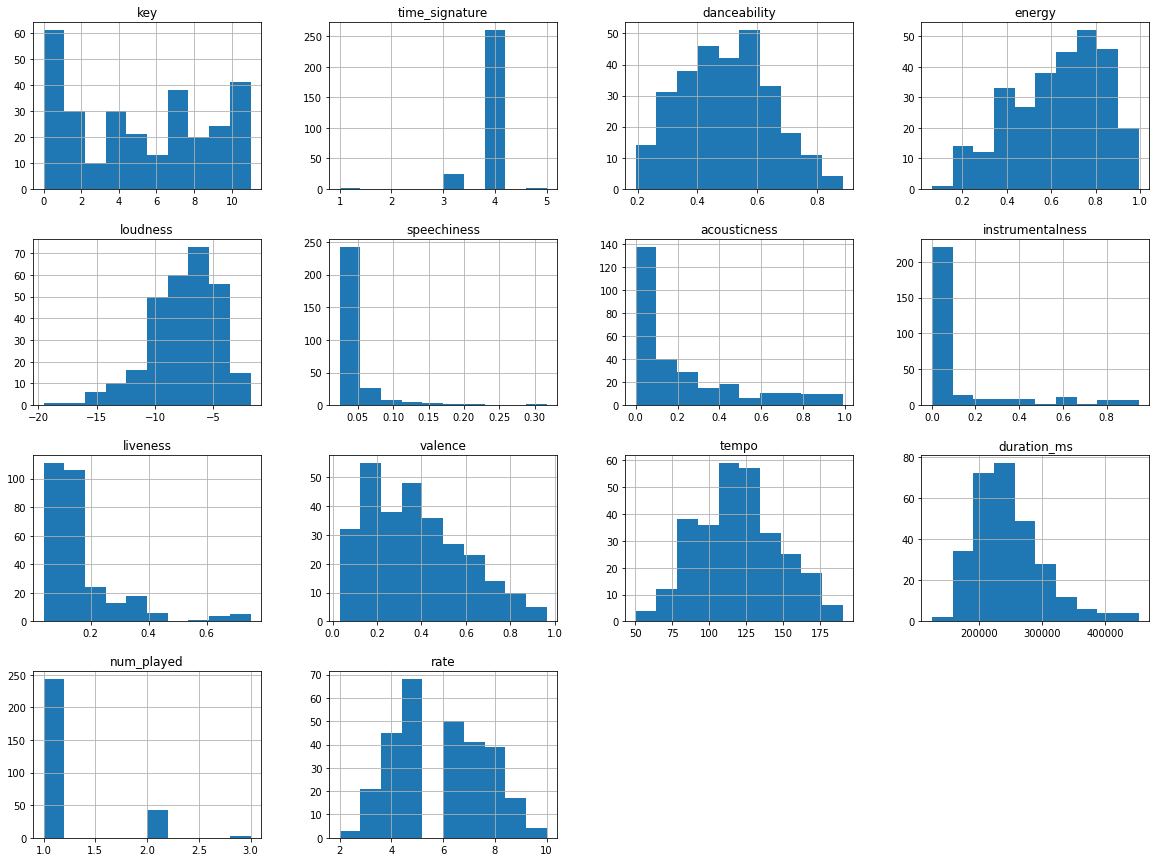

In [48]:
data.hist(bins=10, figsize=(20, 15))

In [53]:
data.corr()

,key,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,num_played,rate
key,1.000000,-0.015050,0.067696,0.059187,-0.067648,0.067150,0.047618,0.026624,0.033682,0.187534,0.046828,0.016746,-0.037180,0.004918
time_signature,-0.015050,1.000000,0.055999,0.121643,0.110568,0.102022,-0.142361,-0.075934,0.071111,0.100741,0.022502,0.019949,-0.002475,-0.009932
danceability,0.067696,0.055999,1.000000,0.081402,0.035897,0.116572,-0.053987,-0.078865,-0.016380,0.499096,-0.147452,-0.221375,0.002617,-0.168180
energy,0.059187,0.121643,0.081402,1.000000,0.802302,0.166917,-0.696775,-0.028843,0.257092,0.515865,0.259958,-0.001057,-0.014001,-0.126445
loudness,-0.067648,0.110568,0.035897,0.802302,1.000000,0.141005,-0.635646,-0.239930,0.177659,0.321432,0.205088,-0.102131,-0.050544,-0.168234
speechiness,0.067150,0.102022,0.116572,0.166917,0.141005,1.000000,-0.085767,-0.037041,0.206901,0.182035,0.090732,-0.140878,-0.069051,-0.127094
acousticness,0.047618,-0.142361,-0.053987,-0.696775,-0.635646,-0.085767,1.000000,0.004472,-0.129762,-0.325865,-0.161947,-0.002534,0.014469,0.123261
instrumentalness,0.026624,-0.075934,-0.078865,-0.028843,-0.239930,-0.037041,0.004472,1.000000,0.018465,-0.020022,0.141368,0.019980,0.108495,0.104783
liveness,0.033682,0.071111,-0.016380,0.257092,0.177659,0.206901,-0.129762,0.018465,1.000000,0.214122,0.051725,0.046275,-0.078803,-0.090345
valence,0.187534,0.100741,0.499096,0.515865,0.321432,0.182035,-0.325865,-0.020022,0.214122,1.000000,0.120147,-0.141221,-0.007751,-0.201796


In [56]:
corr_matrix = data.corr()
corr_matrix["rate"].sort_values(ascending=False) 

rate                1.000000
num_played          0.268010
duration_ms         0.239369
acousticness        0.123261
instrumentalness    0.104783
key                 0.004918
time_signature     -0.009932
tempo              -0.051869
liveness           -0.090345
energy             -0.126445
speechiness        -0.127094
danceability       -0.168180
loudness           -0.168234
valence            -0.201796
Name: rate, dtype: float64

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [71]:
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])

In [72]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
transformed_train_X = pipeline.fit_transform(train_X)

In [76]:
model = LinearRegression()
model.fit(transformed_train_X, train_y)

LinearRegression()

In [81]:
# test performance
sample_X = test_X.iloc[:5]
sample_X_prepared = pipeline.transform(sample_X)
print("predictions:", model.predict(sample_X_prepared))
print("actual:", list(test_y.iloc[:5]))

predictions: [6.46090515 5.99165353 4.69055152 5.16087782 4.99409146]
actual: [6.0, 7.0, 5.0, 3.0, 5.0]


In [86]:
# evaluate performance
from sklearn.metrics import mean_squared_error
test_X_prepared = pipeline.transform(test_X)
test_predictions = model.predict(test_X_prepared)
lin_mse = mean_squared_error(test_y, test_predictions)
np.sqrt(lin_mse)

1.8260168109707342

In [89]:
import joblib

In [92]:
joblib.dump(pipeline, "models/linear_regression/pipeline.joblib")
joblib.dump(model, "models/linear_regression/model.joblib")

['models/linear_regression/model.joblib']

In [93]:
test_X.head()

,key,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
45,11,4,0.447,0.494,-8.004,0.0622,0.574000,0.003590,0.1470,0.161,90.000
157,1,4,0.484,0.731,-6.694,0.0379,0.431000,0.000000,0.1510,0.510,101.654
256,1,4,0.656,0.780,-4.743,0.0854,0.001120,0.020000,0.1510,0.607,151.401
42,1,3,0.587,0.810,-5.096,0.0327,0.000278,0.000044,0.3370,0.553,123.029
181,5,4,0.733,0.663,-5.766,0.0322,0.101000,0.000007,0.0694,0.530,127.974
